In [1]:
pip install yahoo_finance_api2

Note: you may need to restart the kernel to use updated packages.


In [2]:
from yahoo_finance_api2 import share
from yahoo_finance_api2.exceptions import YahooFinanceError
import pandas as pd
import matplotlib.pyplot as plt
import japanize_matplotlib
import datetime
now = datetime.datetime.now()
now = now.strftime("%y%m%d")

In [9]:
def main():
    num = len(data_dict)
    #fig, ax = plt.subplots(num, 1, figsize=(16, 3*num))
    fig, ax = plt.subplots(figsize=(10, 6))
    legend_list = []
    i = 0
    for mykey, company_name in data_dict.items():
        #日本株version
#         company_code = str(mykey) + '.T'
        #海外株version
        company_code = str(mykey)
        my_share = share.Share(company_code)
        
        try:
            # 1日毎の1年分のデータを取得する場合
            symbol_data = my_share.get_historical(share.PERIOD_TYPE_YEAR,
                                                  1,
                                                  share.FREQUENCY_TYPE_DAY,
                                                  1)
            # 5分毎の10日分のデータを取得する場合
            '''
            symbol_data = my_share.get_historical(share.PERIOD_TYPE_DAY,
                                                  10,
                                                  share.FREQUENCY_TYPE_MINUTE,
                                                  5)
            '''
            df = pd.DataFrame(symbol_data.values(), index=symbol_data.keys()).T
            df.timestamp = pd.to_datetime(df.timestamp, unit='ms')
            # 日本標準時間に変換
            df.index = pd.DatetimeIndex(df.timestamp, name='timestamp').tz_localize('UTC').tz_convert('Asia/Tokyo')
            # csvファイルに保存
#             df.to_csv(now + "_" + str(mykey) + "_" + company_name + ".csv", index=False)
            #ax[i].set_title( "{0} ({1})".format(company_name, mykey))
            ax.plot(df.index, df.close)
            ax.grid(True)
            ax.set_ylabel("Stock Price [Yen]")
            #ax[i].label_outer() 一番外側のラベルのみ表示
            legend_list.append(str(mykey) + " " + company_name)
            if i == (num - 1):
                ax.set_xlabel("Date")
        except YahooFinanceError as e:
            print(e.message)
            pass
        i += 1
    ax.legend(labels= legend_list,
              bbox_to_anchor=(1.05, 0.5, 0.5, .100), 
              borderaxespad=0.,
              ncol=1,
              mode="expand",
              title="Company")
    plt.rcParams['font.size'] = 18 # ラベルやタイトルなど全フォントのデフォルトサイズ
    plt.subplots_adjust(right=0.7)
    plt.tight_layout() # ラベルレイアウトを調整する。文字がはみ出ないようにする。
    plt.show()
#     fig_name = now + "_stock_price.png"
#     plt.savefig(fig_name)

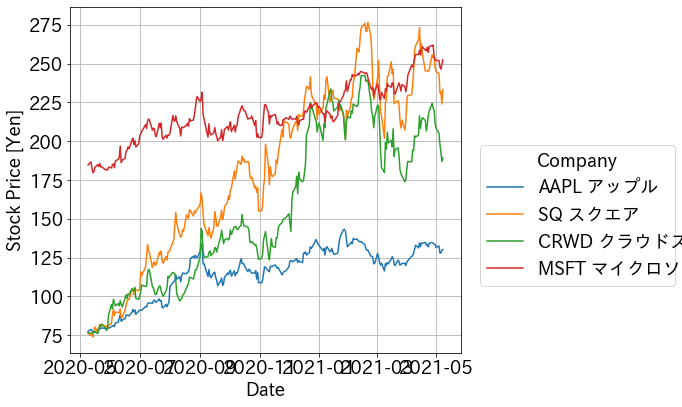

In [10]:
if __name__ == '__main__':
    data_dict = {
        "AAPL":"アップル",
        "SQ":"スクエア",
        "CRWD":"クラウドストライク",
        "MSFT":"マイクロソフト"
    }
    main()